# Advanced Python: Principal Component Analysis (PCA)

<center>
<img src="../pictures/escher_pattern.avif" style="width:676px;height:392px;">
<br>
<i>Day and Night (1938, M.C. Escher)</i>
</center>

Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction and data visualization and usually a good first step in data analysis in neuroscience, psychology and beyond. In this week's sessions, we will explore PCA with 2 sklearn built-in datasets.

A secondary theme is to practice showing and manipulating *images* in Python.
References:
1. [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html)

## PCA with digits dataset

In [5]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# load dataset
from sklearn.datasets import load_digits
digits = load_digits()
digits_data = digits.data
digits_target = digits.target

### Warm-up exercises:
1. `digits_data` contains all the samples of handwritten digits and is of shape (n_samples, n_features); `digits_target` contains the corresponding labels.
   1. What is the shape of `digits_data` and `digits_target`?
   2. How many *unique* labels are there in `digits_target`?
2. Turns out, each sample in `digits_data` is a (square) image.
   1. Use `plt.imshow` to visualize first 4 samples.
   > *Hint:* You should use `reshape` to convert the 1D array into a 2D array.
3. (Grayscale) Images and 2D arrays of pixel values are just 2 sides of the same coin. (Feel free to print out the values for some example images.) How can you flip the image horizontally or vertically using slicing? On your own, add and subtract images together to create new images. What effects do you see?

In [8]:
# put your code here
print("Shape of digits data:", digits_data.shape)
print("Shape of digits target:", digits_target.shape)
print("unique tagets", np.unique(digits_target))

Shape of digits data: (1797, 64)
Shape of digits target: (1797,)
unique tagets [0 1 2 3 4 5 6 7 8 9]


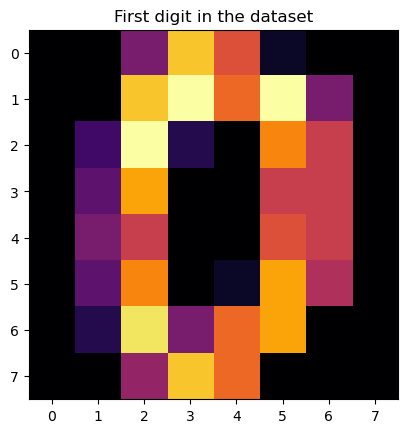

In [22]:
plt.title("First digit in the dataset")
plt.imshow(digits_data[0,:].reshape(8,8), cmap="inferno")

In [ ]:
# reverse/flip a list
A = [1, 2, 3, 4]
print(A[::-1])

[4, 3, 2, 1]


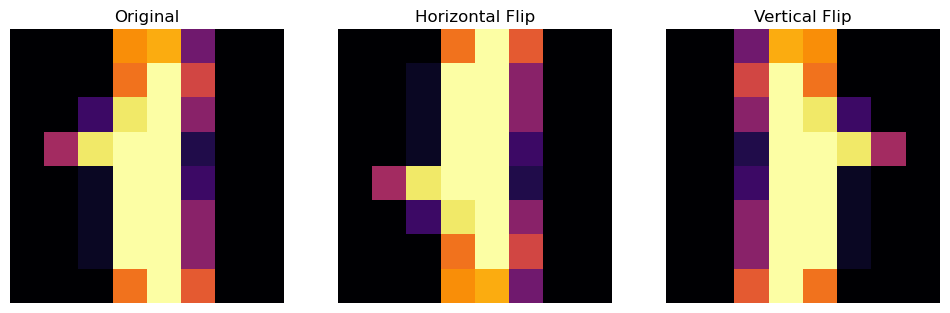

In [20]:
# flip the image
img = digits_data[1,:].reshape(8,8)
img_hflip = img[::-1, :]
img_vflip = img[:, ::-1]

plt.subplots(1, 3, figsize=(12, 4))
for i, img_data in enumerate([img, img_hflip, img_vflip]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img_data, cmap="inferno")
    plt.axis("off")
    plt.title(["Original", "Horizontal Flip", "Vertical Flip"][i])


### Preprocess the data
Prior to applying PCA, we will standardize the data by scaling each feature to unit variance and zero 0 (typically `sklearn.PCA` deals with demeaning internally, but it does not scale the data to unit variance).

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
digits_data_scaled = scaler.fit_transform(digits_data)

### Run PCA
We can use a built-in PCA implementation from `sklearn.decomposition`. Similarly to linear regression, we need to first create a PCA object.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA() # initialize an instance of PCA

# fit and transform the data
# you can call .fit(), .transform() separately 
# if you have other datasets to transform
digits_data_pca = pca.fit_transform(digits_data_scaled)

### Exercises
1. Go to the documentation of `sklearn.decomposition.PCA` and find out what the *attributes* are for the PCA object.
2. Plot *cumulative* explained variance ratio for our PCA object. What trend do you expect to see (if any)? How many components do you need to capture 60% of the variance? How many for 80%? How many for 90%?
3. How much variance is explained by the first 2 components? How about the first 3 components?

31 PCs needed to explain 90% of variance


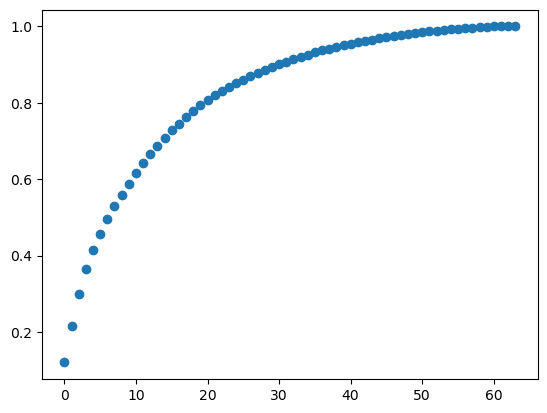

In [27]:
# cumulative explained variance (ratio)
cum_var_exp = pca.explained_variance_ratio_.cumsum()
plt.plot(cum_var_exp, "o")

print(np.where(cum_var_exp > 0.90)[0][0] + 1, "PCs needed to explain 90% of variance")  # find the number of components needed to explain 80% variance

### Exercises
1. Check the components of PCA object. What are they?
   > *Hint:* You can use `pca.components_` to get the components.
2. Visualize the first 12 components as images.
3. Check sample 0's PCA projection. What are the most important components for this sample?
4. Visualize sample 0 now compressed into the first 12 components. How does it look like? How does it compare to the original image? 

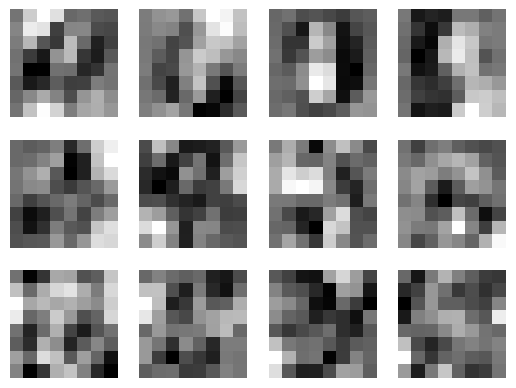

In [31]:
pca.components_.shape
# first pc

for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(pca.components_[i].reshape(8, 8), cmap="gray")
    plt.axis("off")

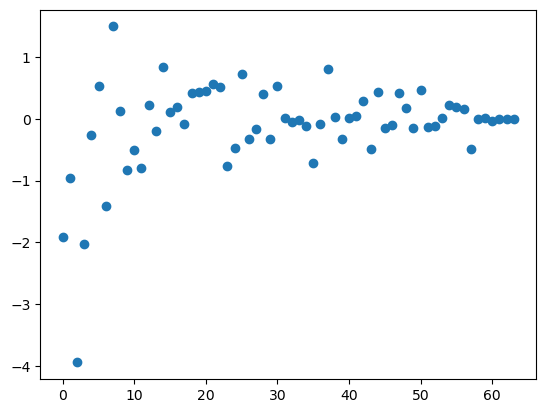

In [33]:
plt.plot(digits_data_pca[0,:], "o")

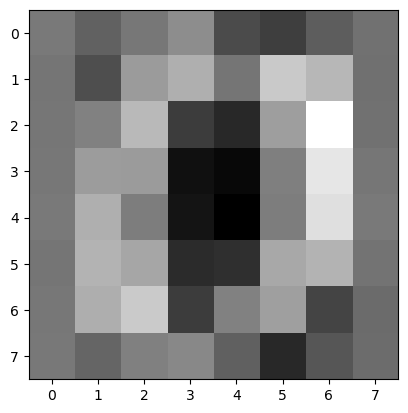

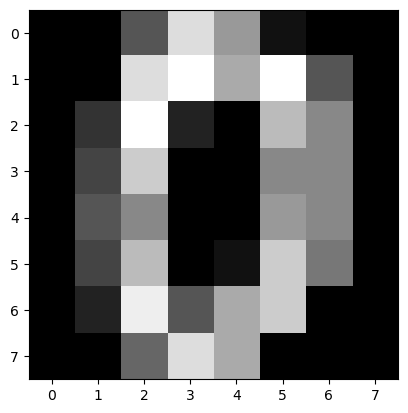

In [36]:
from copy import deepcopy
n_pcs = 64

img = deepcopy(pca.mean_).reshape(8, 8)
for i in range(n_pcs):
    img += pca.components_[i].reshape(8, 8) * digits_data_pca[0, i]

plt.imshow(img, cmap="gray")
plt.figure()
plt.imshow(digits_data[0,:].reshape(8, 8), cmap="gray")